# S2 Satellite Image Segementation

Sentinel2 takes pictures of Earth. We are using these images to study sea ice. 

In this study, one task is to label the sea ice from the picture. We used color segmentation for this task.

## Import Packages

In [5]:
#!pip install opencv-python
import cv2
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

import cv2
import matplotlib.pyplot as plt
import numpy as np

# Sentinel 2 Satellite Image

## Examine the Satellite Image

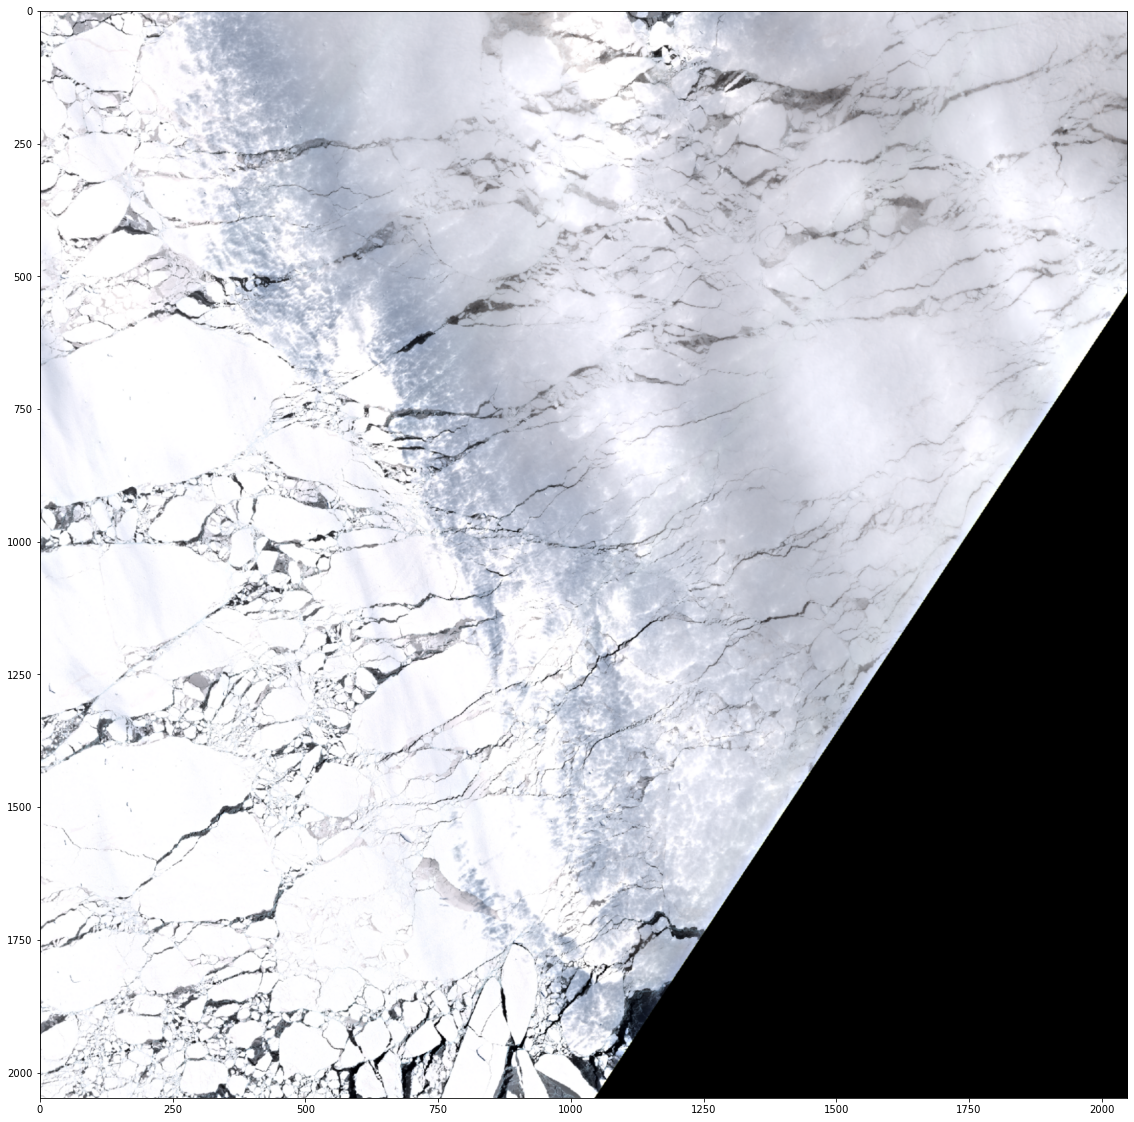

In [8]:
img = cv2.imread("s2_vis_02.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.rcParams['figure.figsize'] = [20, 20]
plt.imshow(img)
plt.show()

## Check RGB Distribution

In [9]:
def show_rgb_dist(img):

    # extract the red, green and blue pixels from the picture
    r, g, b = cv2.split(img)

    # Plot the range of the pixels
    # create a plot
    fig = plt.figure()
    fig.set_figheight(7) # 1.18in or 3cm
    fig.set_figwidth(12) # 2.75in or 7cm
    axis = fig.add_subplot(1, 1, 1, projection="3d")
    # extract the total number of pixels
    pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1], 3))
    norm = colors.Normalize(vmin=-1.,vmax=1.)
    norm.autoscale(pixel_colors)
    pixel_colors = norm(pixel_colors).tolist()

    axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
    axis.set_xlabel("Red")
    axis.set_ylabel("Green")
    axis.set_zlabel("Blue")
    plt.show()

def show_hsv_dist(img):
    # convert RGB to HSV
    hsv_nemo = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    # extract the hue, saturation, and value
    h, s, v = cv2.split(hsv_nemo)

    fig = plt.figure()
    fig.set_figheight(7) # 1.18in or 3cm
    fig.set_figwidth(12) # 2.75in or 7cm
    axis = fig.add_subplot(1, 1, 1, projection="3d")

    # extract the total number of pixels
    pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1], 3))
    norm = colors.Normalize(vmin=-1.,vmax=1.)
    norm.autoscale(pixel_colors)
    pixel_colors = norm(pixel_colors).tolist()

    axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
    axis.set_xlabel("Hue")
    axis.set_ylabel("Saturation")
    axis.set_zlabel("Value")
    plt.show()

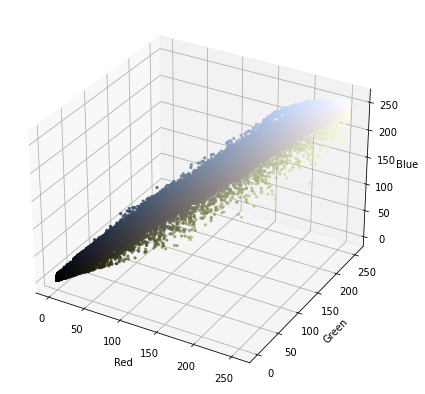

In [10]:
show_rgb_dist(img)

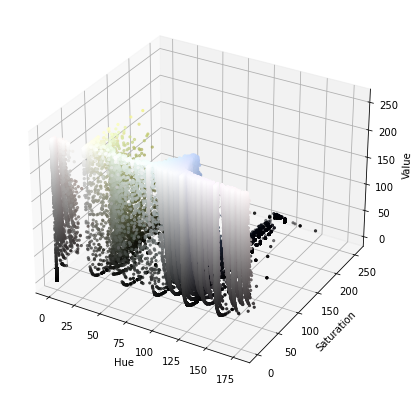

In [11]:
show_hsv_dist(img)

In [12]:
print(img.shape) # Print image shape


(2048, 2048, 3)


## Segment the ICE

Since ice is mostly white, we will isolate the white pixels

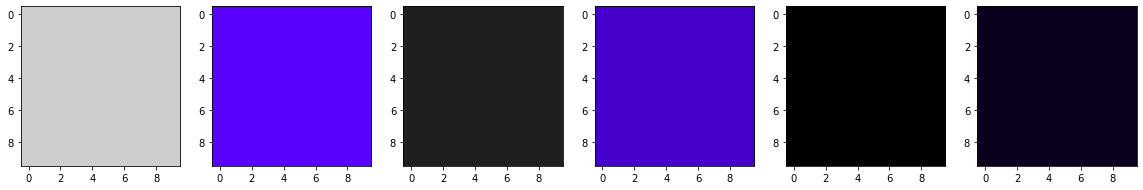

In [13]:
from matplotlib.colors import hsv_to_rgb
# define range of white color in HSV

#lower_white = (234, 10, 211)
#upper_white = (238, 10, 247)

#lower_white = (0, 0, 205) #increase v to specify ow
#medium_white = (185, 60, 255) #increase h to specify si
#upper_band = [h+10, s+40, v+40], lower_band = [h-10, s-40, v-40]
#[h-10, s-40, v-40] for lower and [h+10, s+10, v+40] for upper for the
# brighter to dark
#color h = 203, s = 5, v = 247
#color h = 170, s = 5, v = 235
#color h = 199, s = 7.65, v = 224
#color h = 169, s = 7.65, v = 178.5
#color h = 158.8, s = 104.5, v = 28

#snow covered ice, young ice, thin ice, water
#lower_sice = (0, 0, 235)#(127, 7, 94) #increase v to specify ow
#upper_sice = (185, 255, 255)#(147, 53, 232) #increase h to specify si

lower_ice = (0, 0, 205)#(127, 7, 94) #increase v to specify ow
upper_ice = (185, 255, 255)#(147, 53, 232) #increase h to specify si

lower_tice = (0, 0, 31)#(127, 7, 94) #increase v to specify ow
upper_tice = (185, 255, 204)#(147, 53, 232) #increase h to specify si

lower_water = (0, 0, 0)#(127, 7, 94) #increase v to specify ow
upper_water = (185, 255, 30)#(147, 53, 232) #increase h to specify si

#ls_square = np.full((10, 10, 3), lower_sice, dtype=np.uint8)/255.0
#ds_square = np.full((10, 10, 3), upper_sice, dtype=np.uint8)/255.0
li_square = np.full((10, 10, 3), lower_ice, dtype=np.uint8)/255.0
di_square = np.full((10, 10, 3), upper_ice, dtype=np.uint8)/255.0
lt_square = np.full((10, 10, 3), lower_tice, dtype=np.uint8)/255.0
dt_square = np.full((10, 10, 3), upper_tice, dtype=np.uint8)/255.0
lw_square = np.full((10, 10, 3), lower_water, dtype=np.uint8)/255.0
dw_square = np.full((10, 10, 3), upper_water, dtype=np.uint8)/255.0

plt.rcParams['figure.figsize'] = [20, 20]
#plt.subplot(1, 8, 1)
#plt.imshow(hsv_to_rgb(ls_square))
#plt.subplot(1, 8, 2)
#plt.imshow(hsv_to_rgb(ds_square))
plt.subplot(1, 6, 1)
plt.imshow(hsv_to_rgb(li_square))
plt.subplot(1, 6, 2)
plt.imshow(hsv_to_rgb(di_square))
plt.subplot(1, 6, 3)
plt.imshow(hsv_to_rgb(lt_square))
plt.subplot(1, 6, 4)
plt.imshow(hsv_to_rgb(dt_square))
plt.subplot(1, 6, 5)
plt.imshow(hsv_to_rgb(lw_square))
plt.subplot(1, 6, 6)
plt.imshow(hsv_to_rgb(dw_square))
plt.show()

In [14]:
# Get a "mask" over the image for each pixel
# if a pixel's color is between the lower and upper white, its mask is 1
# Otherwise, the pixel's mask is 0
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
#mask_sice = cv2.inRange(hsv_img, lower_sice, upper_sice)
mask_ice = cv2.inRange(hsv_img, lower_ice, upper_ice)
mask_tice = cv2.inRange(hsv_img, lower_tice, upper_tice)
mask_water = cv2.inRange(hsv_img, lower_water, upper_water)
# apply the mask over the original image
# if the mask is 1, we change the pixel to red; otherwise, we will
# keep these pixels
#result_sice = cv2.bitwise_and(img, img, mask=mask_sice)
result_ice = cv2.bitwise_and(img, img, mask=mask_ice)
result_tice = cv2.bitwise_and(img, img, mask=mask_tice)
result_water = cv2.bitwise_and(img, img, mask=mask_water)
# the following is water and thin ice
mask_not_ice = cv2.bitwise_not(mask_ice)
result_not_ice = cv2.bitwise_and(img, img, mask=mask_not_ice)


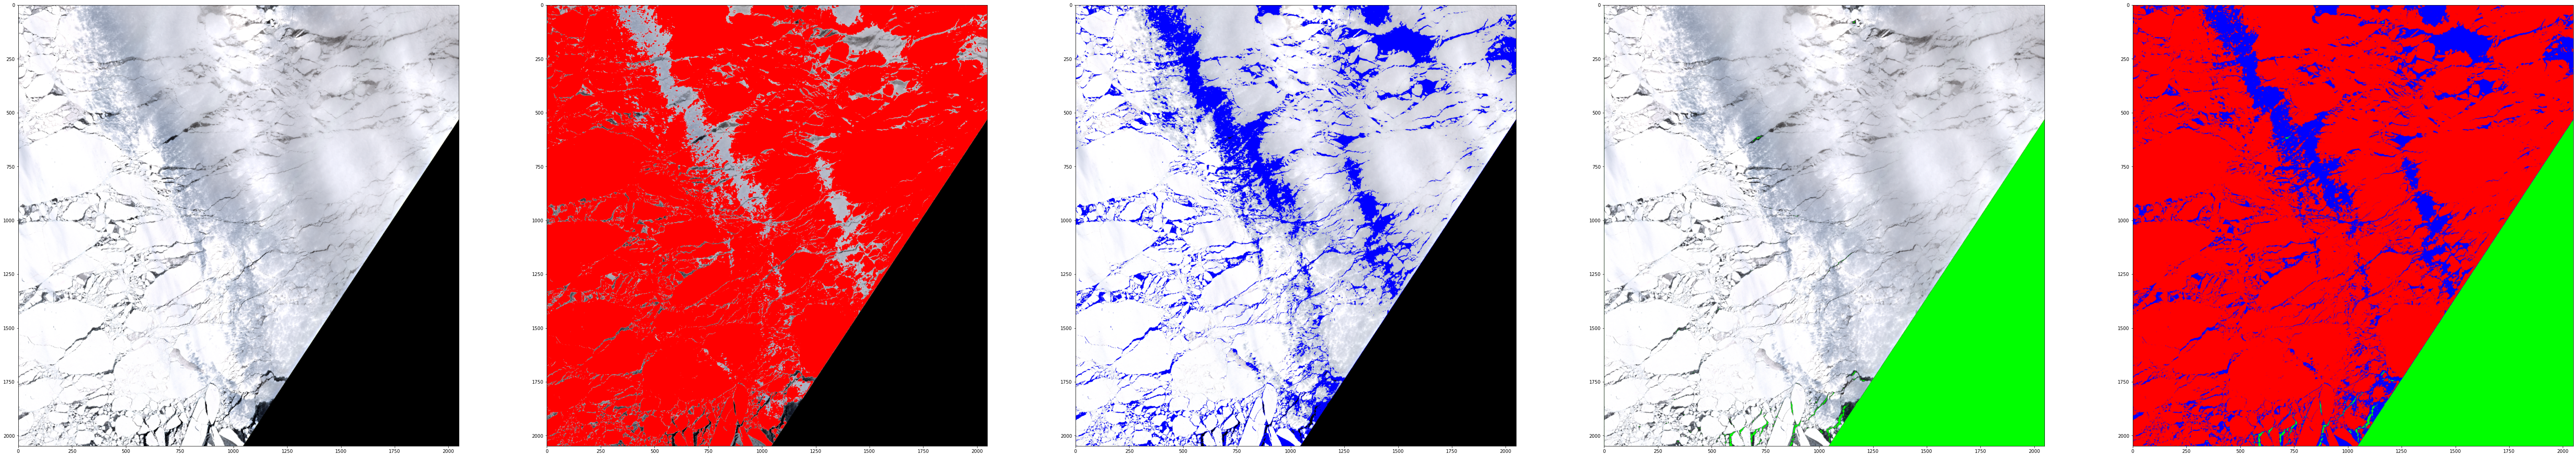

In [15]:
plt.rcParams['figure.figsize'] = [100, 100]

# duplicate the image
#img1 = img.copy()
# in the duplicated image, set marked pixels to red (i.e., RGB 255,0,0)
#img1[mask_sice == 255] = [0, 255, 255]

img2 = img.copy()
img2[mask_ice == 255] = [255, 0, 0]

img3 = img.copy()
img3[mask_tice == 255] = [0, 0, 255]

img4 = img.copy()
img4[mask_water == 255] = [0, 255, 0]

img5 = img.copy()
img5[mask_ice == 255] = [255, 0, 0]
img5[mask_tice == 255] = [0, 0, 255]
img5[mask_water == 255] = [0, 255, 0]
#pic3 = pic.copy()
#pic3[mask_notwhite == 255] = [0, 255, 255]

# plot the original image and red-painted image
plt.subplot(1, 5, 1)
plt.imshow(img)
plt.subplot(1, 5, 2)
plt.imshow(img2)
plt.subplot(1, 5, 3)
plt.imshow(img3)
plt.subplot(1, 5, 4)
plt.imshow(img4)
plt.subplot(1, 5, 5)
plt.imshow(img5)

# Using cv2.imwrite() method
# Saving the image
#img5 = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)
#cv2.imwrite('s2_seg_59.png', img5)
